In [1]:
# Import libraries
import pandas as pd
import numpy as np
import networkx as nx  
import json
import random
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [43]:
def preprocess():
    # read in JSON into array of arrays
    with open('train.json') as json_file:
        df = pd.read_json(json_file, orient='columns')
        cuisines = df.cuisine.unique()
#         print(cuisines)
    return df, cuisines


In [47]:
dataset = preprocess()

In [48]:
def get_cuisine_data(df, cuisine):
    data = df[df['cuisine']==cuisine].ingredients
    return data

In [49]:
def create_cuisine_dict(df, cuisines):
    cuisine_dict = {}
    for cuisine in cuisines:
        cuisine_dict["{0}".format(cuisine)] = get_cuisine_data(df, cuisine)
    return cuisine_dict

In [50]:
cuisine_dict = create_cuisine_dict(dataset[0], dataset[1])
cuisine_dict

{'greek': 0        [romaine lettuce, black olives, grape tomatoes...
 93       [ground pork, finely chopped fresh parsley, on...
 103      [minced garlic, dried oregano, red wine vinega...
 153      [orange, anise, cinnamon sticks, unflavored ge...
 186      [fresh dill, yoghurt, salt, myzithra, large eg...
 195      [olive oil, salt, hamburger buns, paprika, cho...
 214      [pepper, dried mint flakes, salt, dried oregan...
 262      [garbanzo beans, liquid, black pepper, garlic,...
 278      [dry red wine, cinnamon sticks, Turkish bay le...
 352      [mint leaves, sliced almonds, vanilla lowfat y...
 394      [kosher salt, garlic, greek yogurt, cracked bl...
 400      [water, large garlic cloves, dried currants, f...
 416      [ground cloves, eggplant, grated parmesan chee...
 429      [tomatoes, extra-virgin olive oil, juice, roma...
 448      [olive oil, salt, chopped parsley, fresh rosem...
 516      [olive oil, onions, greek seasoning, feta chee...
 538      [tomatoes, olive oil,

In [64]:
# define function to create association rule graph
def draw_graph(rules, num_rules):
    G1 = nx.DiGraph()

    color_map=[]
    N = 50
    colors = np.random.rand(N)       

    for i in range(num_rules): 
        G1.add_node("R"+str(i))

        for a in rules.iloc[i]['antecedents']:
            G1.add_node(a)
            G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)

        for c in rules.iloc[i]['consequents']:
            G1.add_node(c)
            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)

    edges = G1.edges()
    colors = [G1[u][v]['color'] for u,v in edges]
    weights = [G1[u][v]['weight'] for u,v in edges]

    pos = nx.spring_layout(G1, k=16, scale=1)
    nx.draw(G1, pos, edges=edges, node_color = color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)            

    for p in pos:  # raise text positions
        pos[p][1] += 0.07
    nx.draw_networkx_labels(G1, pos)
    plt.show()

In [67]:
def create_rules(cuisine_data):
    # encode data for apriori algo
    encoder = TransactionEncoder()
    fit_data = encoder.fit(cuisine_data).transform(cuisine_data)
    encoded_df = pd.DataFrame(fit_data, columns=encoder.columns_)
    
    # define frequent itemsets
    frequent_itemsets = apriori(encoded_df, min_support=0.05, use_colnames=True)
    print(frequent_itemsets)
    
    # create association rules
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)
    print(rules[['antecedents', 'consequents', 'support', 'confidence']])
    
    # draw graph
    draw_graph(rules, 10)

greek
     support                          itemsets
0   0.085106               (all-purpose flour)
1   0.075745                    (black pepper)
2   0.076596                          (butter)
3   0.057872              (chopped fresh mint)
4   0.057021                   (cooking spray)
5   0.159149                        (cucumber)
6   0.226383                   (dried oregano)
7   0.051915                        (eggplant)
8   0.068085                            (eggs)
9   0.194894          (extra-virgin olive oil)
10  0.162553                     (feta cheese)
11  0.214468            (feta cheese crumbles)
12  0.055319               (flat leaf parsley)
13  0.091915                      (fresh dill)
14  0.188936               (fresh lemon juice)
15  0.069787                   (fresh oregano)
16  0.096170                   (fresh parsley)
17  0.183830                          (garlic)
18  0.215319                   (garlic cloves)
19  0.071489                    (greek yogurt)
20  0.1

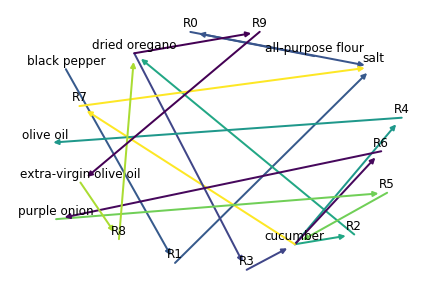

southern_us
     support                                    itemsets
0   0.282870                         (all-purpose flour)
1   0.168750                             (baking powder)
2   0.103472                               (baking soda)
3   0.062731                              (black pepper)
4   0.060417                               (brown sugar)
5   0.290509                                    (butter)
6   0.146759                                (buttermilk)
7   0.053935                            (cayenne pepper)
8   0.143981                                      (eggs)
9   0.062269                                     (flour)
10  0.059954                                    (garlic)
11  0.069676                             (garlic cloves)
12  0.055093                             (garlic powder)
13  0.060417                          (granulated sugar)
14  0.107639                       (ground black pepper)
15  0.057407                           (ground cinnamon)
16  0.081019       

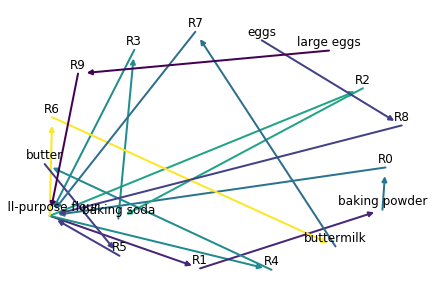

filipino
      support                                    itemsets
0    0.128477                                (bay leaves)
1    0.107285                               (brown sugar)
2    0.079470                                    (butter)
3    0.050331                                   (cabbage)
4    0.169536                                   (carrots)
5    0.052980                                   (chicken)
6    0.098013                              (coconut milk)
7    0.121854                               (cooking oil)
8    0.075497                               (corn starch)
9    0.123179                                      (eggs)
10   0.129801                                (fish sauce)
11   0.430464                                    (garlic)
12   0.120530                             (garlic cloves)
13   0.086093                                    (ginger)
14   0.086093                              (green onions)
15   0.164238                       (ground black pepper)
16   

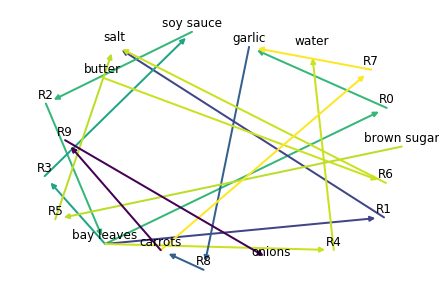

indian
      support                                 itemsets
0    0.081918                           (basmati rice)
1    0.053613                           (black pepper)
2    0.090909                                 (butter)
3    0.052947                             (canola oil)
4    0.065601                                (carrots)
5    0.082917                         (cayenne pepper)
6    0.161505                           (chili powder)
7    0.051615                       (chopped cilantro)
8    0.079587                 (chopped cilantro fresh)
9    0.051948                               (cilantro)
10   0.117549                        (cilantro leaves)
11   0.051948                               (cinnamon)
12   0.085248                        (cinnamon sticks)
13   0.101898                                  (clove)
14   0.071928                           (coconut milk)
15   0.075591                              (coriander)
16   0.070929                       (coriander powder)
17 

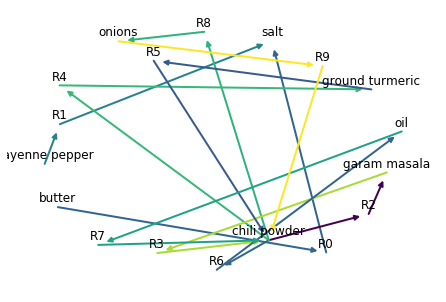

jamaican
      support                                           itemsets
0    0.079848                                (all-purpose flour)
1    0.100760                                         (allspice)
2    0.072243                                    (baking powder)
3    0.195817                                     (black pepper)
4    0.136882                                      (brown sugar)
5    0.117871                                           (butter)
6    0.083650                                          (carrots)
7    0.079848                                   (cayenne pepper)
8    0.068441                                          (chicken)
9    0.085551                                         (cinnamon)
10   0.134981                                     (coconut milk)
11   0.058935                                       (cold water)
12   0.125475                                     (curry powder)
13   0.053232                                         (dark rum)
14   0.199620   

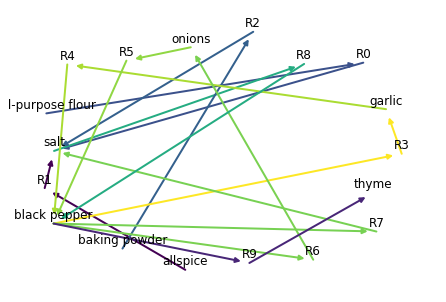

spanish
     support                            itemsets
0   0.053589                 (all-purpose flour)
1   0.071790                      (black pepper)
2   0.055612                     (chopped onion)
3   0.058645                          (cucumber)
4   0.062690                    (diced tomatoes)
5   0.100101                    (dry white wine)
6   0.088979                              (eggs)
7   0.257836            (extra-virgin olive oil)
8   0.082912                 (flat leaf parsley)
9   0.055612                 (fresh lemon juice)
10  0.101112                     (fresh parsley)
11  0.129424                            (garlic)
12  0.293225                     (garlic cloves)
13  0.067745                 (green bell pepper)
14  0.150657               (ground black pepper)
15  0.055612                      (ground cumin)
16  0.121335                       (kosher salt)
17  0.117290                        (large eggs)
18  0.071790               (large garlic cloves)
19  0.072801

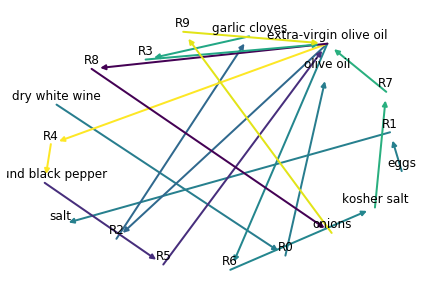

italian
     support                                 itemsets
0   0.117122                      (all-purpose flour)
1   0.081143                           (black pepper)
2   0.131283                                 (butter)
3   0.062644                          (cooking spray)
4   0.053330                     (crushed red pepper)
5   0.054733                         (diced tomatoes)
6   0.054223                            (dried basil)
7   0.079867                          (dried oregano)
8   0.083950                         (dry white wine)
9   0.079995                                   (eggs)
10  0.173769                 (extra-virgin olive oil)
11  0.075019                      (flat leaf parsley)
12  0.100408                            (fresh basil)
13  0.060092                      (fresh lemon juice)
14  0.080505                          (fresh parsley)
15  0.187675                                 (garlic)
16  0.206558                          (garlic cloves)
17  0.201454        

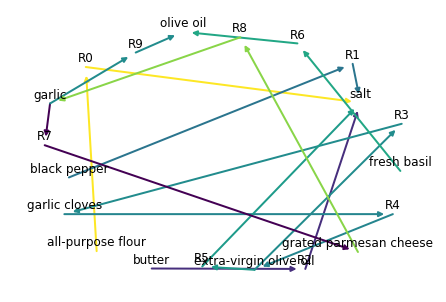

mexican
     support                        itemsets
0   0.051258             (all-purpose flour)
1   0.162007                       (avocado)
2   0.125971                   (black beans)
3   0.059646                  (black pepper)
4   0.058559                        (butter)
5   0.050482                (cayenne pepper)
6   0.061044                 (chicken broth)
7   0.191985                  (chili powder)
8   0.059801              (chopped cilantro)
9   0.140727        (chopped cilantro fresh)
10  0.095837                      (cilantro)
11  0.050947               (cilantro leaves)
12  0.146940                (corn tortillas)
13  0.097080                         (cumin)
14  0.084498                (diced tomatoes)
15  0.080460                 (dried oregano)
16  0.050637                          (eggs)
17  0.127058               (flour tortillas)
18  0.068344                (fresh cilantro)
19  0.100342              (fresh lime juice)
20  0.204567                        (garlic)
21

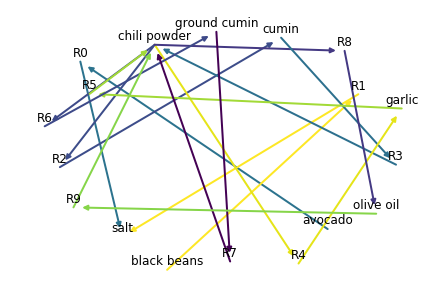

chinese
      support                                 itemsets
0    0.092406                          (Shaoxing wine)
1    0.074074      (boneless skinless chicken breasts)
2    0.087916                            (brown sugar)
3    0.066218                             (canola oil)
4    0.111485                                (carrots)
5    0.061728                          (chicken broth)
6    0.060232                          (chicken stock)
7    0.083427              (chinese five-spice powder)
8    0.338945                            (corn starch)
9    0.086046                         (dark soy sauce)
10   0.107744                                   (eggs)
11   0.175458                           (fresh ginger)
12   0.285447                                 (garlic)
13   0.157501                          (garlic cloves)
14   0.183315                                 (ginger)
15   0.234942                           (green onions)
16   0.057239                    (ground black pepper)
17

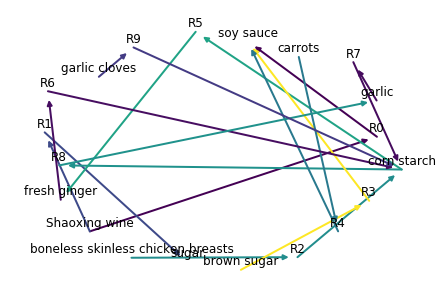

british
     support                                           itemsets
0   0.296020                                (all-purpose flour)
1   0.151741                                    (baking powder)
2   0.090796                                      (baking soda)
3   0.276119                                           (butter)
4   0.073383                                          (carrots)
5   0.237562                                             (eggs)
6   0.101990                                            (flour)
7   0.088308                              (ground black pepper)
8   0.053483                                  (ground cinnamon)
9   0.114428                                      (heavy cream)
10  0.074627                                      (kosher salt)
11  0.136816                                       (large eggs)
12  0.251244                                             (milk)
13  0.067164                                        (olive oil)
14  0.176617                    

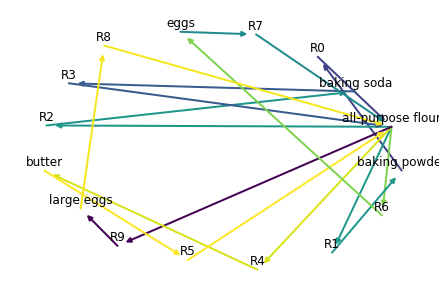

thai
      support                             itemsets
0    0.050032                           (Sriracha)
1    0.058480                    (Thai fish sauce)
2    0.079922               (Thai red curry paste)
3    0.059779                   (asian fish sauce)
4    0.098765                        (beansprouts)
5    0.074724  (boneless skinless chicken breasts)
6    0.135153                        (brown sugar)
7    0.113710                            (carrots)
8    0.051982                   (chopped cilantro)
9    0.106563             (chopped cilantro fresh)
10   0.085120                           (cilantro)
11   0.114360                    (cilantro leaves)
12   0.229370                       (coconut milk)
13   0.050032                           (cucumber)
14   0.052632                       (curry powder)
15   0.068876                               (eggs)
16   0.406108                         (fish sauce)
17   0.063028                        (fresh basil)
18   0.074074             

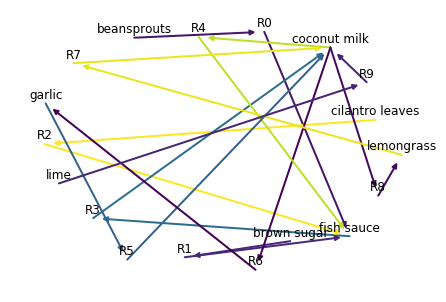

vietnamese
      support                            itemsets
0    0.056970                          (Sriracha)
1    0.061818                  (asian fish sauce)
2    0.153939                       (beansprouts)
3    0.061818                      (black pepper)
4    0.075152                       (brown sugar)
5    0.099394                        (canola oil)
6    0.237576                           (carrots)
7    0.073939            (chopped cilantro fresh)
8    0.093333                          (cilantro)
9    0.122424                   (cilantro leaves)
10   0.059394                       (corn starch)
11   0.121212                          (cucumber)
12   0.058182                            (daikon)
13   0.475152                        (fish sauce)
14   0.104242                      (fresh ginger)
15   0.133333                  (fresh lime juice)
16   0.077576                        (fresh mint)
17   0.289697                            (garlic)
18   0.179394                     (garl

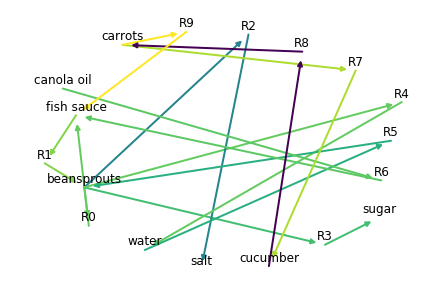

cajun_creole
      support                            itemsets
0    0.188228                 (all-purpose flour)
1    0.144890                 (andouille sausage)
2    0.068564                          (bay leaf)
3    0.142303                        (bay leaves)
4    0.109961                      (black pepper)
5    0.216041                            (butter)
6    0.189521                   (cajun seasoning)
7    0.192109                    (cayenne pepper)
8    0.159120                            (celery)
9    0.111902                       (celery ribs)
10   0.113195                     (chicken broth)
11   0.051746                     (chicken stock)
12   0.093790                    (chopped celery)
13   0.056921         (chopped green bell pepper)
14   0.071151                     (chopped onion)
15   0.066624                       (cooked rice)
16   0.139715                  (creole seasoning)
17   0.119017                    (diced tomatoes)
18   0.104787                     (dr

[153 rows x 4 columns]


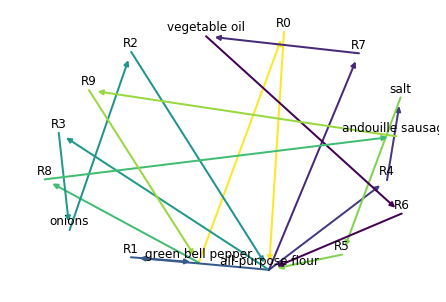

brazilian
     support                             itemsets
0   0.062099                         (bay leaves)
1   0.077088                        (black beans)
2   0.102784                             (butter)
3   0.149893                            (cachaca)
4   0.055675                            (carrots)
5   0.124197                       (coconut milk)
6   0.111349                               (eggs)
7   0.175589                             (garlic)
8   0.177730                      (garlic cloves)
9   0.102784                (ground black pepper)
10  0.055675                                (ice)
11  0.190578                               (lime)
12  0.053533                         (lime juice)
13  0.094218                               (milk)
14  0.252677                          (olive oil)
15  0.284797                             (onions)
16  0.119914                             (pepper)
17  0.062099                    (red bell pepper)
18  0.415418                            

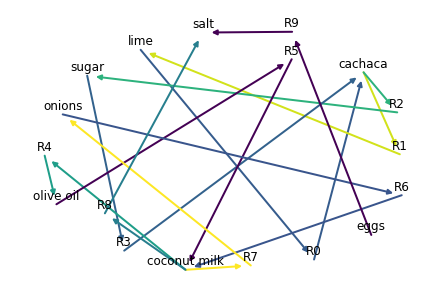

french
     support                                    itemsets
0   0.224112                         (all-purpose flour)
1   0.056311                                  (bay leaf)
2   0.065004                              (black pepper)
3   0.194255                                    (butter)
4   0.083522                                   (carrots)
5   0.062736                             (cooking spray)
6   0.064248                             (dijon mustard)
7   0.092593                            (dry white wine)
8   0.069917                                      (eggs)
9   0.096750                    (extra-virgin olive oil)
10  0.090325                         (fresh lemon juice)
11  0.062736                             (fresh parsley)
12  0.080877                                    (garlic)
13  0.152305                             (garlic cloves)
14  0.145503                       (ground black pepper)
15  0.079365                               (heavy cream)
16  0.057823            

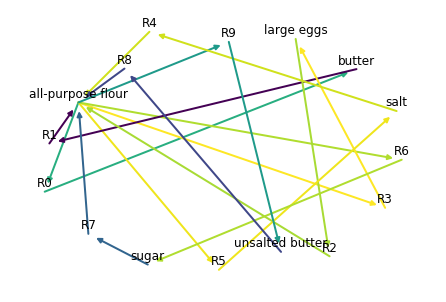

japanese
     support                    itemsets
0   0.129304                   (carrots)
1   0.063247               (corn starch)
2   0.086437                     (dashi)
3   0.101195                      (eggs)
4   0.087140              (fresh ginger)
5   0.116655                    (garlic)
6   0.061138             (garlic cloves)
7   0.133521                    (ginger)
8   0.122980              (green onions)
9   0.050597       (ground black pepper)
10  0.051300                     (honey)
11  0.056219               (kosher salt)
12  0.052706                (large eggs)
13  0.282502                     (mirin)
14  0.059030                      (nori)
15  0.102600                       (oil)
16  0.106817                    (onions)
17  0.183415              (rice vinegar)
18  0.203092                      (sake)
19  0.296557                      (salt)
20  0.160928                 (scallions)
21  0.130710                (sesame oil)
22  0.087843              (sesame seeds)
23  0.3

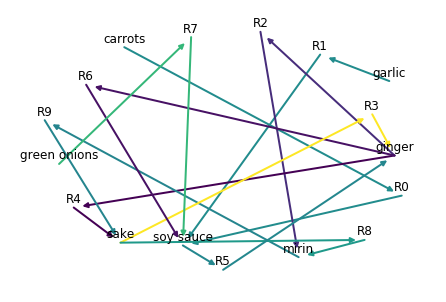

irish
      support                                           itemsets
0    0.328336                                (all-purpose flour)
1    0.053973                                            (bacon)
2    0.167916                                    (baking powder)
3    0.172414                                      (baking soda)
4    0.065967                                     (black pepper)
5    0.056972                                      (brown sugar)
6    0.328336                                           (butter)
7    0.112444                                       (buttermilk)
8    0.080960                                          (cabbage)
9    0.157421                                          (carrots)
10   0.071964                                    (cooking spray)
11   0.134933                                             (eggs)
12   0.062969                                            (flour)
13   0.059970                                    (fresh parsley)
14   0.076462      

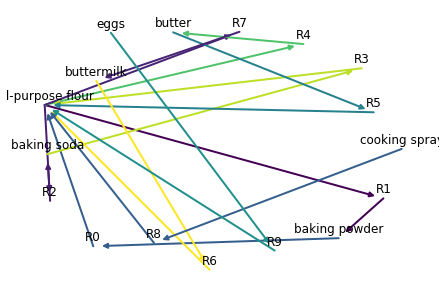

korean
      support                                           itemsets
0    0.163855                                   (Gochujang base)
1    0.051807                                             (beef)
2    0.097590                                     (black pepper)
3    0.139759                                      (brown sugar)
4    0.055422                                       (canola oil)
5    0.204819                                          (carrots)
6    0.061446                                         (cucumber)
7    0.126506                                             (eggs)
8    0.057831                                       (fish sauce)
9    0.122892                                     (fresh ginger)
10   0.365060                                           (garlic)
11   0.204819                                    (garlic cloves)
12   0.173494                                           (ginger)
13   0.353012                                     (green onions)
14   0.110843     

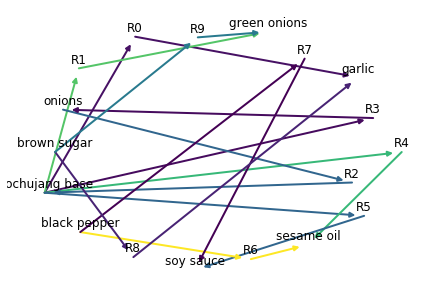

moroccan
      support                                           itemsets
0    0.053593                                (all-purpose flour)
1    0.112058                                     (black pepper)
2    0.071864                                           (butter)
3    0.188794                                          (carrots)
4    0.103532                                   (cayenne pepper)
5    0.064555                                    (chicken stock)
6    0.154689                                        (chickpeas)
7    0.148599                           (chopped cilantro fresh)
8    0.146163                                         (cinnamon)
9    0.085262                                  (cinnamon sticks)
10   0.172960                                         (couscous)
11   0.075518                                            (cumin)
12   0.051157                                       (cumin seed)
13   0.064555                                   (diced tomatoes)
14   0.087698   

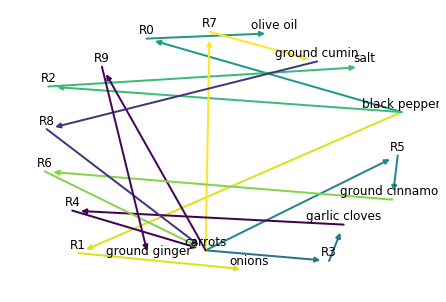

russian
      support                                           itemsets
0    0.071575                                 (active dry yeast)
1    0.251534                                (all-purpose flour)
2    0.071575                                    (baking powder)
3    0.051125                                       (bay leaves)
4    0.108384                                            (beets)
5    0.071575                                     (black pepper)
6    0.212679                                           (butter)
7    0.075665                                          (cabbage)
8    0.157464                                          (carrots)
9    0.065440                                             (dill)
10   0.229039                                             (eggs)
11   0.124744                                            (flour)
12   0.110429                                       (fresh dill)
13   0.087935                                    (garlic cloves)
14   0.108384    

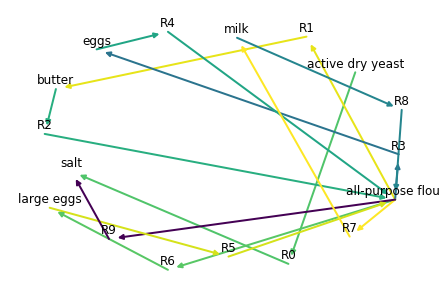

In [68]:


for cuisine in dataset[1]:
    print(cuisine)
    create_rules(cuisine_dict[cuisine])